# Gaussian Model with Uniform Perturbation Kernel


In [1]:
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

from abcsmc.abcsmc import abcsmc
from abcsmc.models import GaussianModel
from abcsmc.priors import UniformPrior
from abcsmc.plotting import plot_results
from abcsmc.plotting import plot_perturbation_sample
from abcsmc.plotting import plot_all_perturbation_sample


In [2]:
imgdir = "../out/images/nb_gauss_uniform"
os.makedirs(imgdir, exist_ok=True)

### Generate observed data $X_0$


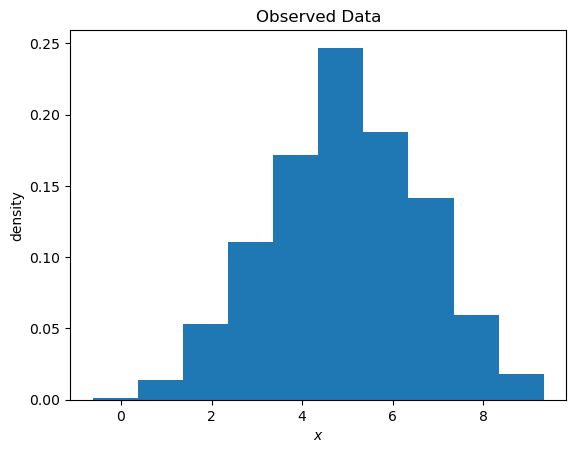

In [3]:
# True model parameters
mu = 5
var = 3
true_params = [mu, var]

# True model and generated "observed" data
model = GaussianModel(mu, var)
data = model.generate_data(1000)

# Parameter indices and names used for plotting
pidx1 = 0
pidx2 = 1
pname1 = "$\mu$"
pname2 = "$\sigma^2$"

plt.hist(data, density=True)
plt.title("Observed Data")
plt.xlabel('$x$');
plt.ylabel("density");

### Define priors


In [4]:
# Priors
prior_mu = UniformPrior(-20, 20)
prior_var = UniformPrior(0, 20)

prior_list = [prior_mu, prior_var]

### Compute summary statistics of the observed data and define a distance function


In [5]:
# Summary statistics of the observed data
data_mu = np.mean(data)
data_var = np.var(data)

# Distance function
def f_dist(x):
    mu_err = np.abs(np.mean(x) - data_mu) / data_mu
    var_err = np.abs(np.var(x) - data_var) / data_var
    return mu_err + var_err

### Define a simulation function

In [6]:
# Simulation function
def f_sim(particle, n=100):
    return GaussianModel(particle[0], particle[1]).generate_data(n)

## Run ABC-SMC

In [7]:
KERNEL_METHOD = 'uniform'
NPARTICLES = 1000
NITERS = 5

EPS0 = 5
EPS_PERCENTILE = 0.15

particles, weights, results_dict = abcsmc(
    nparticles=NPARTICLES, 
    nparams=2, 
    prior_list=prior_list, 
    niters=NITERS,
    sim_func=f_sim,
    dist_func=f_dist, 
    eps0=EPS0, 
    eps_percentile=EPS_PERCENTILE, 
    min_eps=0, 
    kernel_method=KERNEL_METHOD,
    track_all_perturbations = True,
)


Running ABC-SMC...


Iteration:   0%|          | 0/5 [00:00<?, ?it/s]

Current count [Iter 0]:   0%|          | 0/1000 [00:00<?, ?it/s]

Epsilon: 5
Iter 0 finished in 0.0853 secs
Epsilon: 1.515
Iter 1 finished in 1.46 secs
Epsilon: 0.5571
Iter 2 finished in 1.26 secs
Epsilon: 0.2193
Iter 3 finished in 2.35 secs
Epsilon: 0.08352
Iter 4 finished in 4.68 secs


In [8]:
particle_history = results_dict['particle_history']
weight_history = results_dict['weight_history']
score_history = results_dict['score_history']
acceptance_rates = results_dict['acceptance_rates']
epsilon_history = results_dict['epsilon_history']
sampling_idx_history = results_dict['sampling_index_history']
particle_idx_history = results_dict['particle_index_history']
all_particle_history = results_dict['all_particle_history']
all_sampling_idx_history = results_dict['all_sampling_index_history']
all_particle_acceptance_history = results_dict['all_particle_acceptance_history']

## Plot results

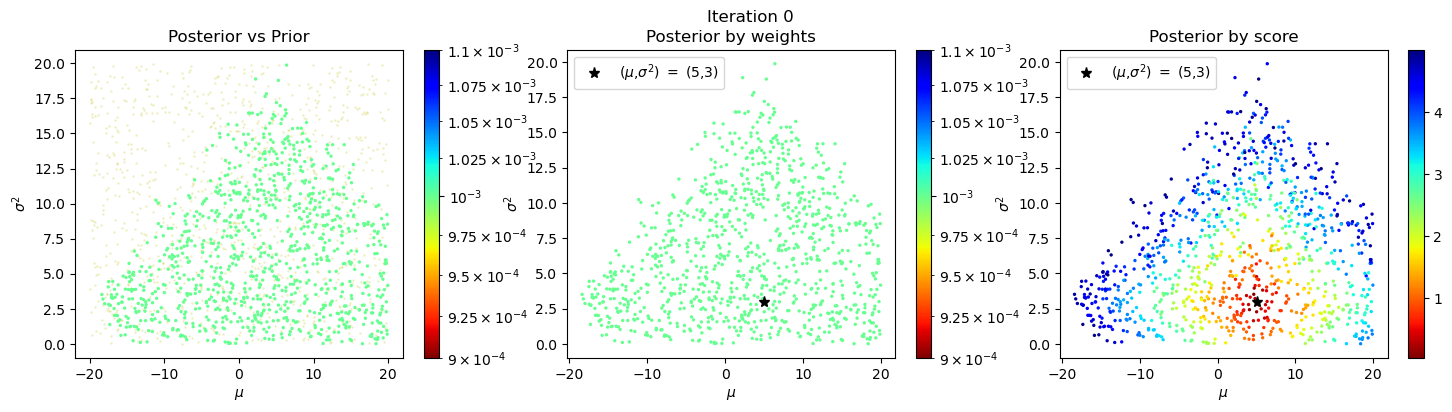

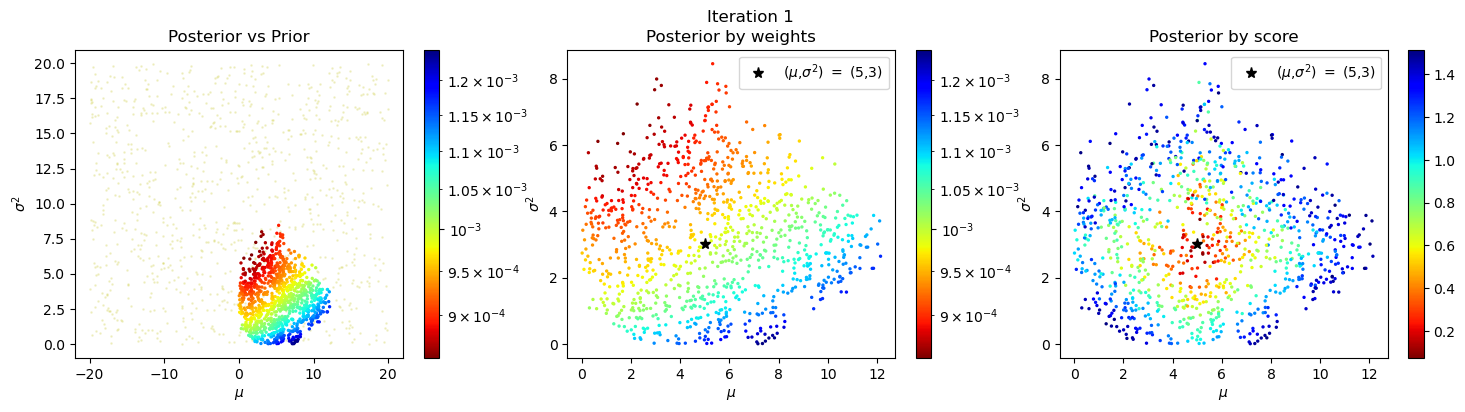

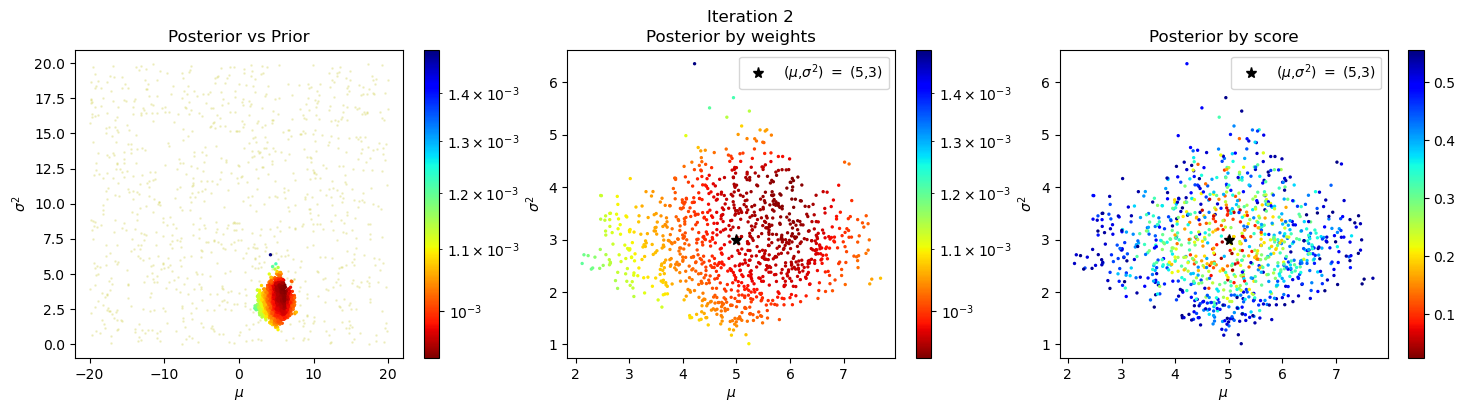

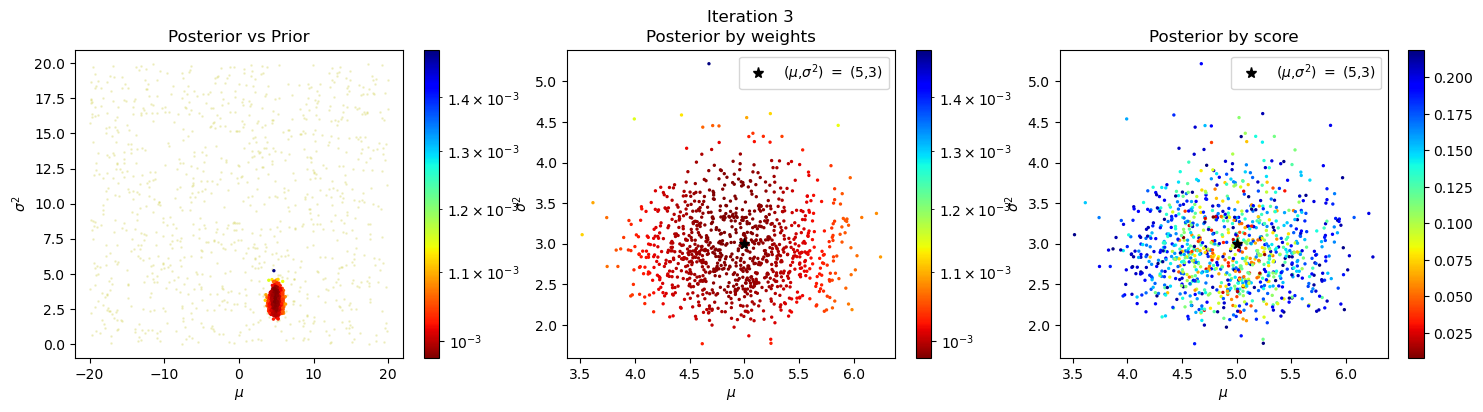

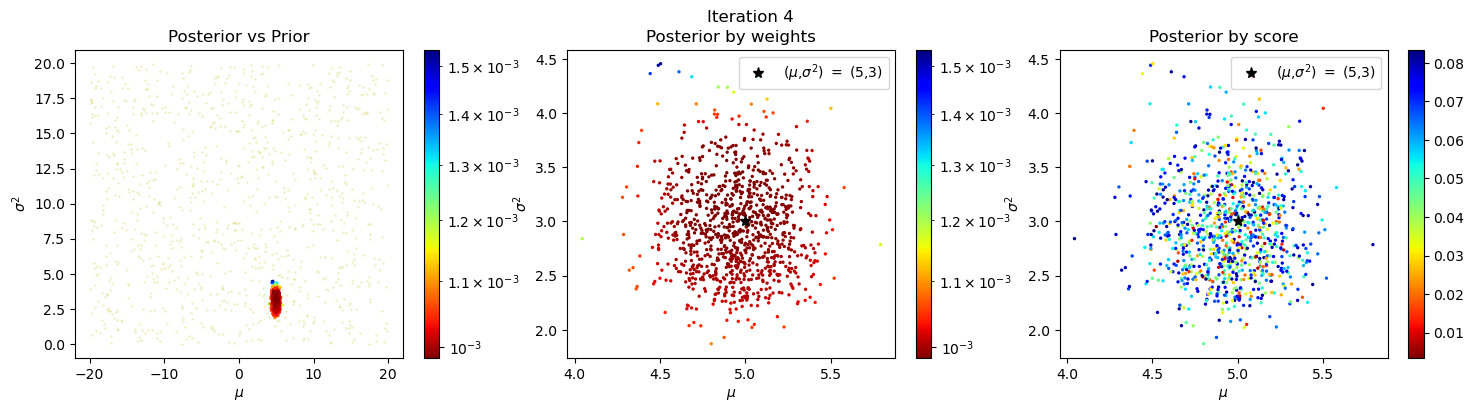

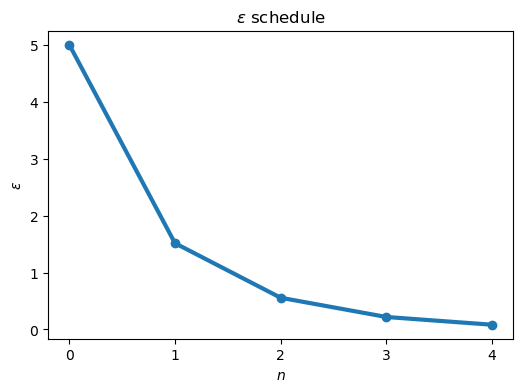

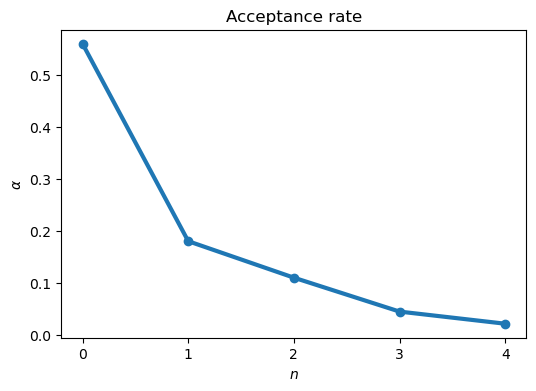

In [9]:
plot_results(
    particle_history, weight_history, score_history, acceptance_rates,
    epsilon_history, prior_list, 
    pname1=pname1, pname2=pname2,
    true_param=true_params,
    save=True, imgdir=imgdir
)

## Perturbations

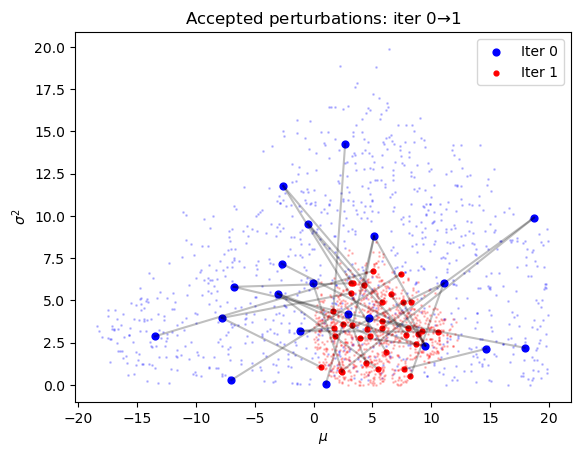

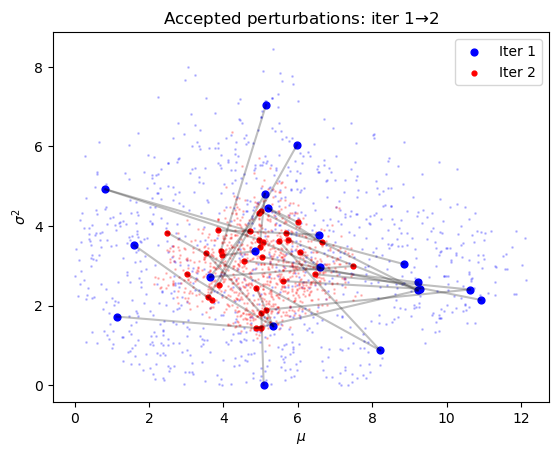

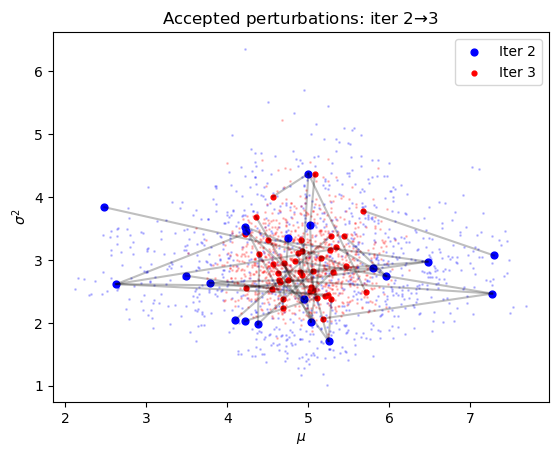

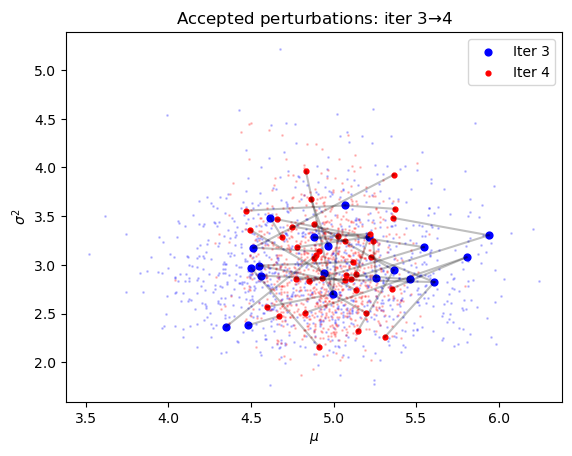

In [10]:
N_PERTRUB_SAMP = 20
for iteridx in range(len(particle_history) - 1):
    plot_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )

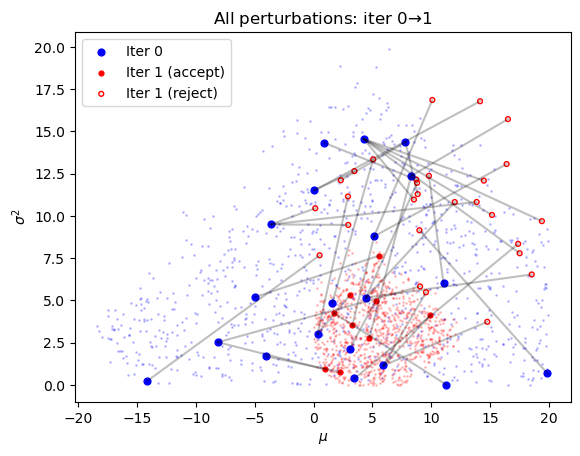

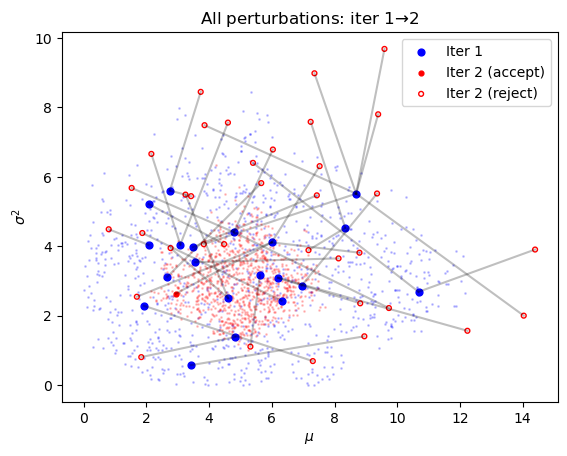

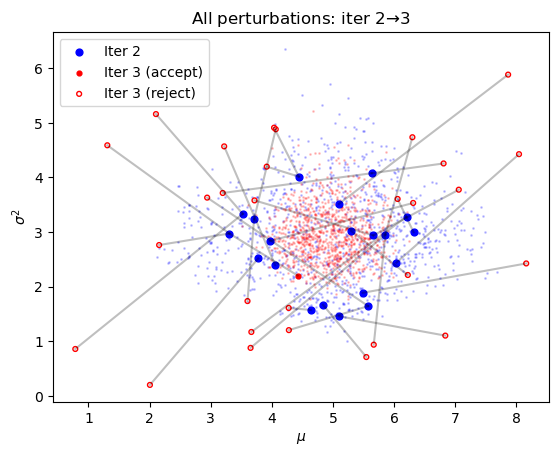

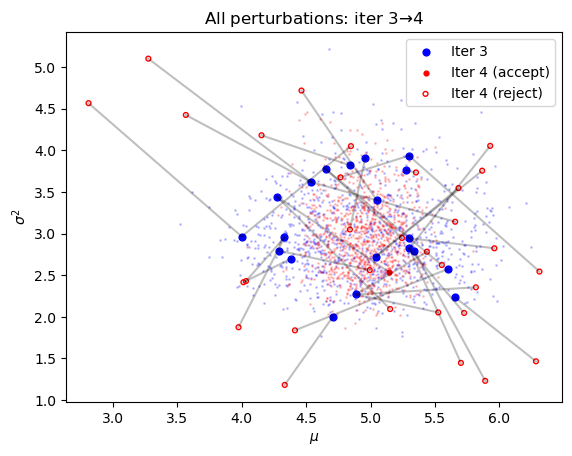

In [11]:
N_PERTRUB_SAMP = 20

for iteridx in range(len(particle_history) - 1):
    plot_all_perturbation_sample(
        iteridx, particle_history, sampling_idx_history, particle_idx_history, 
        all_particle_history, all_sampling_idx_history, 
        acceptance_history=all_particle_acceptance_history,
        nsamp=N_PERTRUB_SAMP, 
        pname1=pname1, pname2=pname2,
        imgdir=imgdir, 
        saveas=f"perturbation_{iteridx}_{iteridx+1}.png"
    )